In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


list_min_lambda = [0,0.1,1,10]
list_n_genes = [0,1,5,10,25,50,75,100]
list_ch = ['4']
#from supplementary table 1, removed EPGN because not in gene expression
set_target_genes = set(pd.read_csv('../data/List_gene_ch4_COPD.txt', header=None)[0])

In [4]:
dict_name = {'with_CellComp':'with Cell Composition','with_pheno':' with Phenotype variables','with_pheno_fev1':' with Phenotype variables','rnd_Prior':'random Prior','rnd_PPI':'random PPI'}

def compare_base_review(name_exp, hue_boxplot = None,y_lim=None):
    new_folder_name = 'Pcorr_output_review_'+name_exp
    
    # Load example Original Partial Correlation
    df_pcorr_old = pd.read_csv("../data/LTRC/nreg_10_minL_1_ch_4/obs_case.csv",index_col=0)
    df_pcorr_new = pd.read_csv("../data/Reviewer_response/%s/nreg_10_minL_1_ch_4/obs_case.csv"%new_folder_name,index_col=0)
    df_pcorr_new = df_pcorr_new.loc[df_pcorr_old.index,df_pcorr_old.index]

    
    x = df_pcorr_new.values[np.triu_indices_from(df_pcorr_new,1)]
    y = df_pcorr_old.values[np.triu_indices_from(df_pcorr_new,1)]
    diff = np.abs(x-y)
    diff_index = np.where(diff>0.001)
    print('Max distance:',(diff[diff_index]).max().max(),)
    plt.xlabel('Pcorr')
    plt.ylabel('Pcorr '+dict_name[name_exp])
    plt.title('Pcorr comparison\nCOPD, n_genes: %i,min_lambda: %i'%(10,1))
    plt.scatter(x,y)
    plt.plot([-1,1],[-1,1],c='r',linestyle='--',label='x=y')
    plt.axvline(0,c='black',alpha=.5,linewidth=.5)
    plt.axhline(0,c='black',alpha=.5,linewidth=.5)
    plt.legend()
    plt.show()
    #Boxplot distance PartialCorrelation between base vs edit. 
    df_l2 = []
    for pop in ['case','control']:
        for ml in list_min_lambda:
            for ng in list_n_genes:
                if ml!=0 and ng==0:
                    continue
                path_file = "../data/Reviewer_response/%s/nreg_%i_minL_%i_ch_4/obs_%s.csv"%(new_folder_name,ng,ml,pop)
                df_pcorr_new = pd.read_csv(path_file,index_col=0)
                path_file = "../data/LTRC/nreg_%i_minL_%i_ch_4/obs_%s.csv"%(ng,ml,pop)
                df_pcorr_old = pd.read_csv(path_file,index_col=0)
                df_pcorr_new = df_pcorr_new.loc[df_pcorr_old.index,df_pcorr_old.index]
                x = df_pcorr_new.values[np.triu_indices_from(df_pcorr_new,1)]
                y = df_pcorr_old.values[np.triu_indices_from(df_pcorr_new,1)]
                diff = np.mean(np.abs(x-y))
                df_l2.append([pop,ng,ml,diff])

    df_l2=pd.DataFrame(df_l2,columns=['pop','n_genes','min_lambda','Mean Absolute Difference'])
    #df_l2['logl2'] = np.log10(df_l2.l2+1)

    sns.boxplot(data=df_l2,x='n_genes',y='Mean Absolute Difference',hue=hue_boxplot)
    if y_lim is not None:
        plt.ylim(y_lim)
    plt.title('Difference in Partial Correlations \n Base vs %s'%dict_name[name_exp])
    plt.show()
    return df_l2

Max distance: 0.0653206550177641


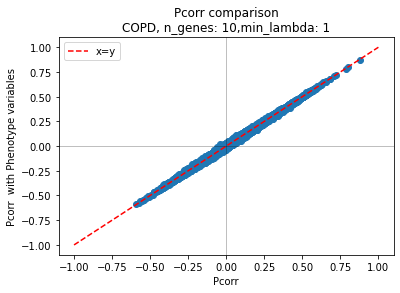

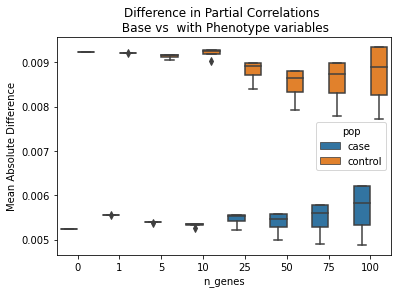

In [5]:
# Reviewr 1 add Phenotype variables as controlling factors 
tmp = compare_base_review(name_exp='with_pheno',hue_boxplot='pop')

Max distance: 0.0702315780706502


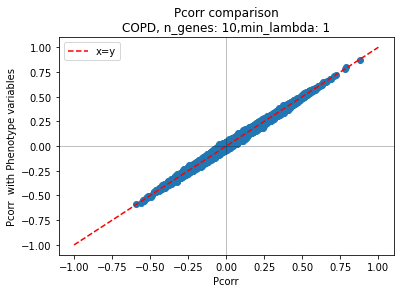

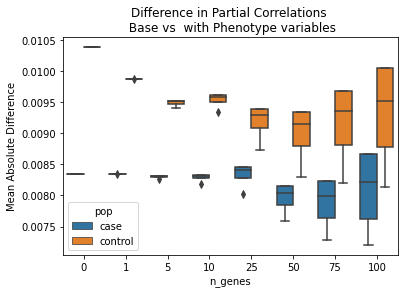

In [6]:
tmp = compare_base_review(name_exp='with_pheno_fev1',hue_boxplot='pop')

Max distance: 0.4056606125208747


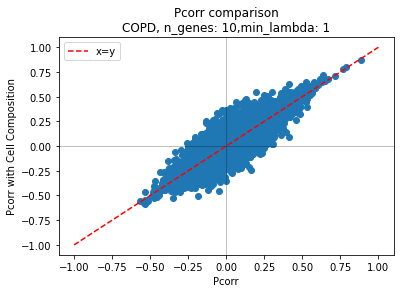

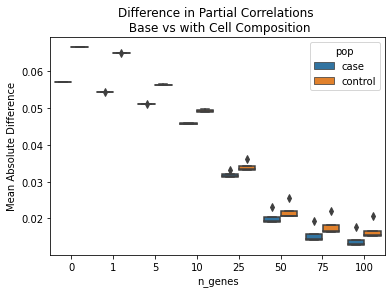

In [7]:
tmp =  compare_base_review('with_CellComp',hue_boxplot='pop')

Max distance: 0.9629776036666023


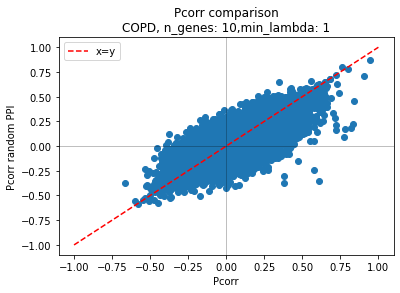

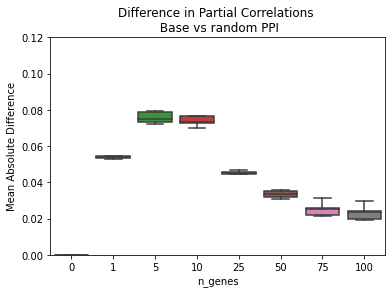

Max distance: 1.0222476195865373


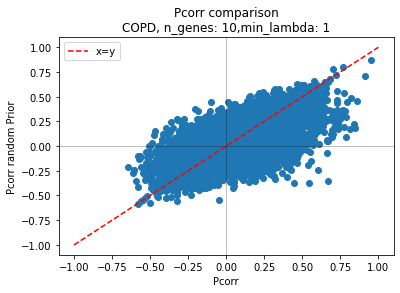

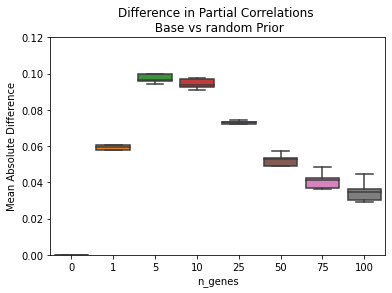

In [8]:
df_l2_rnd_ppi = compare_base_review(name_exp='rnd_PPI',y_lim=[0,.12])
df_l2_rnd_prior = compare_base_review(name_exp='rnd_Prior',y_lim=[0,.12])

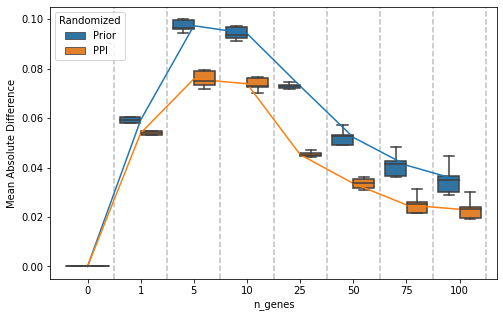

In [9]:
df_l2_rnd_prior['Randomized'] = 'Prior'
df_l2_rnd_ppi['Randomized'] = 'PPI'

plt.figure(figsize=[8,5])
df_l2_rnd = pd.concat([df_l2_rnd_prior,df_l2_rnd_ppi])
ax = sns.boxplot(data=df_l2_rnd,x='n_genes',y='Mean Absolute Difference',hue='Randomized')
lines = [plt.axvline(x+.5,c='gray',linestyle='--',alpha=.5) for x in ax.get_xticks()]
plt.plot(ax.get_xticks(),df_l2_rnd.query('Randomized=="Prior"').groupby(['n_genes'])['Mean Absolute Difference'].mean())
plt.plot(ax.get_xticks(),df_l2_rnd.query('Randomized=="PPI"').groupby(['n_genes'])['Mean Absolute Difference'].mean())
a=1

### Chromosome 5

In [19]:
import pickle 
#import Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
from tqdm import tqdm
# setting path
sys.path.append('../src')
import utils_pcorr 

list_min_lambda = [0,0.1,1,10]
list_n_genes = [0,1,5,10,25,50,75,100]
list_ch = ['5']

list_pop = ['case','control']
import utils_pcorr 

dict_params = {'gex_name':'', # for all the reviewr response it's LTRC 
               'list_pop':list_pop,
               'list_ch':list_ch,
               'list_n_genes':list_n_genes,
               'list_min_lambda':list_min_lambda}


dir_pcorr_output = "../data/Reviewer_response/Pcorr_output_review_ch5/"

df_melt_pcor_ltrc,array_pcors_ltrc,list_params_ltrc = utils_pcorr.read_data(dict_params,dir_pcorr_output)
print('Load LTRC:', df_melt_pcor_ltrc.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.47it/s]


Load LTRC: (3054860, 9)


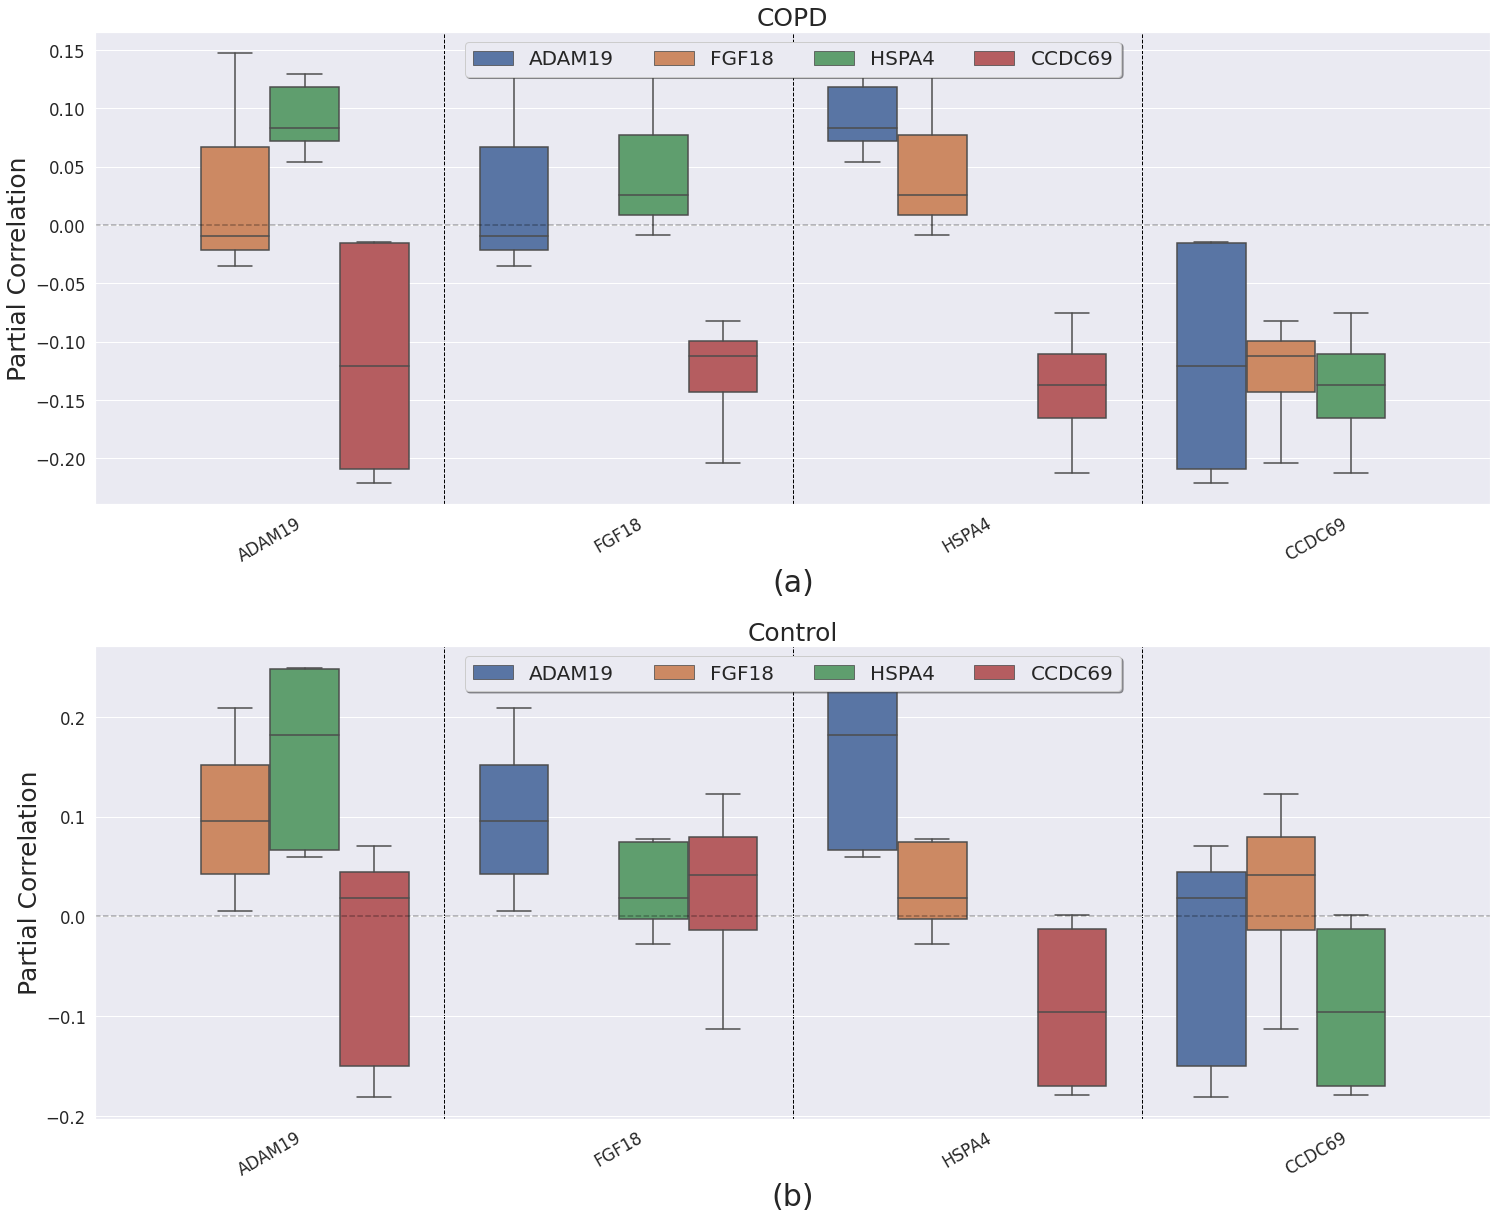

In [23]:
sns.set(font_scale=1.5)
set_target_genes = set(pd.read_csv('../data/List_gene_ch5_COPD.txt', header=None)[0])
list_pop = ['case','control']

utils_pcorr.plot_edges_distr(df_melt_pcor_ltrc,list_pop,set_target_genes,ch='5')
#plt.savefig('../figures/Figure 3.pdf')